# Preamble

## setup of environment

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/Few-Shot Project/registration-vxm/source-code

/content/gdrive/.shortcut-targets-by-id/1kJ6hvD4S-gF34kZ670rDNwU-KvWnQSXg/Few-Shot Project/registration-vxm/source-code


## pystrum

In [ ]:
!git clone https://github.com/adalca/pystrum

Cloning into 'pystrum'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 449 (delta 70), reused 91 (delta 41), pack-reused 309
Receiving objects: 100% (449/449), 88.23 KiB | 1.19 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
!pip install ./pystrum

Processing ./pystrum
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pystrum: filename=pystrum-0.2-py3-none-any.whl size=19534 sha256=c4babbf57cb6902752488d5094e79d3533aa4f9952f3e2c8fe24f81602ab1233
  Stored in directory: /tmp/pip-ephem-wheel-cache-fj808xzi/wheels/99/09/04/4ea81ee47327b5ba906071e0eb1051e8ec16e25536660e22a0
Successfully built pystrum
  Attempting uninstall: pystrum
    Found existing installation: pystrum 0.2
    Uninstalling pystrum-0.2:
      Successfully uninstalled pystrum-0.2


## neurite

In [ ]:
!git clone https://github.com/adalca/neurite

Cloning into 'neurite'...
remote: Enumerating objects: 3083, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 3083 (delta 229), reused 177 (delta 99), pack-reused 2760
Receiving objects: 100% (3083/3083), 699.14 KiB | 2.28 MiB/s, done.
Resolving deltas: 100% (2191/2191), done.


In [ ]:
!pip install ./neurite

Processing ./neurite
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for neurite: filename=neurite-0.1-py3-none-any.whl size=105915 sha256=49983372171a6472c1a15086475c7b98d015e246117773b876fa78e8fc37fb7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-r5gj1vnh/wheels/ba/31/f7/f1d25b42595ca1b6eab2f256a897494e4ce015cefae23980a0
Successfully built neurite


## voxelmorph

In [ ]:
!git clone https://github.com/voxelmorph/voxelmorph

Cloning into 'voxelmorph'...
remote: Enumerating objects: 2924, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 2924 (delta 132), reused 195 (delta 125), pack-reused 2717
Receiving objects: 100% (2924/2924), 129.13 MiB | 19.73 MiB/s, done.
Resolving deltas: 100% (1879/1879), done.
Checking out files: 100% (45/45), done.


In [ ]:
!pip install ./voxelmorph

Processing ./voxelmorph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for voxelmorph: filename=voxelmorph-0.1-py3-none-any.whl size=53409 sha256=e8b5d2de8f0dc52fcf69af0786d751c15aa491b0dc1a5638f3e65a7916c2abd4
  Stored in directory: /tmp/pip-ephem-wheel-cache-9dzyiolq/wheels/bf/cb/41/1f1122f97e110f55434ab3caa4ab750b0e3f21c8d310cb69a2
Successfully built voxelmorph


## imports

In [ ]:
!pip install tqdm -q
!pip install pypng -q

In [4]:
# imports
import os, sys
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import png
import numpy as np
import shutil
import imageio
import pickle

# third party imports
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'
tf.executing_eagerly()

True

In [5]:
# local imports
import voxelmorph as vxm
import neurite as ne

---

# Data

In [6]:
%cd ../

/content/gdrive/.shortcut-targets-by-id/1kJ6hvD4S-gF34kZ670rDNwU-KvWnQSXg/Few-Shot Project/registration-vxm


## load & normalize

In [7]:
# load
with open('../structured-data/patients_images.pkl', 'rb') as f:
    patients = pickle.load(f)

In [8]:
# normalize data
for p_id in patients.keys():
    max_ = patients.get(p_id).max()
    patients[p_id] = patients.get(p_id).astype('float')/max_

In [9]:
# verify
for p_id in patients.keys():
    print(str(p_id) + ":", patients.get(p_id).min(), "-", patients.get(p_id).max()) 

1: 0.0 - 1.0
2: 0.0 - 1.0
3: 0.0 - 1.0
5: 0.0 - 1.0
8: 0.0 - 1.0
10: 0.0 - 1.0
13: 0.0 - 1.0
15: 0.0 - 1.0
19: 0.0 - 1.0
20: 0.0 - 1.0
21: 0.0 - 1.0
22: 0.0 - 1.0
31: 0.0 - 1.0
32: 0.0 - 1.0
33: 0.0 - 1.0
34: 0.0 - 1.0
36: 0.0 - 1.0
37: 0.0 - 1.0
38: 0.0 - 1.0
39: 0.0 - 1.0


## visualize

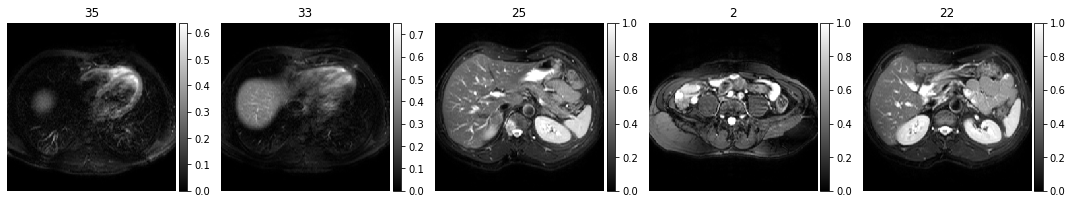

In [10]:
p_id = np.random.choice(list(patients.keys()), 1)[0]
idx = np.random.randint(0, patients.get(p_id).shape[0], size=5)

# visualize
examples = [e for e in patients.get(p_id)[idx, ...]]
ne.plot.slices(examples, cmaps=['gray'], do_colorbars=True, titles=idx, imshow_args=[{'origin':'lower'}]);

---

## data_generator

In [11]:
def data_generator(patients, bs, patient_id=None, slice_ids=[]):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """
    
    if len(slice_ids) != 0:
        bs = len(slice_ids)
    
    # extract data shape and dimension
    vol_shape = list(patients.values())[0].shape[1:] 
    ndims = len(vol_shape)
    
    # prepare a zero array the size of the deformation
    zero_phi = np.zeros([bs, *vol_shape, ndims])
    
    while True:
        if patient_id is None:
            patient_id = np.random.choice(list(patients.keys()), 1)[0]
        patient = np.array(patients.get(patient_id))

        if len(slice_ids) == 0:
            slice_ids = np.random.randint(0, patient.shape[0] - 1, size=bs)
        slice_ids = np.array(slice_ids)

        moving_images = patient[slice_ids, ..., np.newaxis]
        fixed_images = patient[slice_ids + 1, ..., np.newaxis]
        inputs = [moving_images, fixed_images]
        
        # prepare outputs (the 'true' moved image)
        # we also wish to penalize the deformation field. 
        outputs = [fixed_images, zero_phi]
        
        yield (inputs, outputs)

# Model

In [12]:
def get_model(nb_features, lambda_param, adam_rate, batch_size, epochs, steps_per_epoch):
    inshape = list(patients.values())[0].shape[1:] 
    vxm_model = vxm.networks.VxmDense(inshape, nb_features)
    losses = [vxm.losses.NCC().loss, vxm.losses.Grad('l2').loss]
    vxm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=adam_rate), loss=losses, loss_weights=[1, lambda_param])
    train_generator = data_generator(patients, bs=batch_size)
    hist = vxm_model.fit_generator(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=2);
    return vxm_model, hist

In [13]:
def plot_history(hist, loss_name='loss'):
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

# Train

In [14]:
nb_features = [
    [32, 64, 64, 128, 128],         # encoder features
    [128, 64, 64, 64, 64, 32, 32, 32]  # decoder features
]

In [15]:
vxm_models = []
hists = []
lams = [0.01]
for i, lam in enumerate(lams):
    print()
    print("model number", i, " with lambda = ", lam, ":")
    vxm_model, hist = get_model(nb_features, lambda_param=lam, adam_rate=1e-3, batch_size=16, epochs=10, steps_per_epoch=200)
    vxm_models.append(vxm_model)
    hists.append(hist)


model number 0  with lambda =  0.01 :
Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


KeyboardInterrupt: ignored

# Results

In [16]:
def show(vxm_model, patients, patient_id=None, slice_ids=[]):
    if patient_id is None:
        patient_id = np.random.choice(list(patients.keys()), 1)[0]
    patient = np.array(patients.get(patient_id))
    if len(slice_ids) == 0:
        slice_ids = np.random.randint(0, patient.shape[0] - 1, size=1)
    for i in slice_ids:
        # get some data
        val_generator = data_generator(patients, bs=1, patient_id=patient_id, slice_ids=[i])
        val_input, _ = next(val_generator)
        val_pred = vxm_model.predict(val_input)

        # visualize
        images = [img[0, :, :, 0] for img in val_input + val_pred] 
        titles = ['moving', 'fixed', 'moved', 'flow']
        ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True, imshow_args=[{'origin':'lower'}]);

In [19]:
slice_ids = [5, 15, 25]
for i, vxm_model in enumerate(vxm_models):
    print("model number", i, " with lam = ", lams[i], ": ")
    plot_history(hists[i])
    print(hists[i].history['loss'][-1])
    show(vxm_model, patients, slice_ids=slice_ids)
    print("----------------------------------------------------------------------")
    print()

# Save & Load

In [22]:
vxm_model = vxm_models[0]

IndexError: ignored

In [31]:
# save weights
vxm_model.save_weights("./trained-models/tf/1/tf_model")

In [29]:
# load weights
inshape = list(patients.values())[0].shape[1:] 
vxm_model = vxm.networks.VxmDense(inshape, nb_features)
vxm_model.load_weights("./trained-models/tf/1/tf_model")

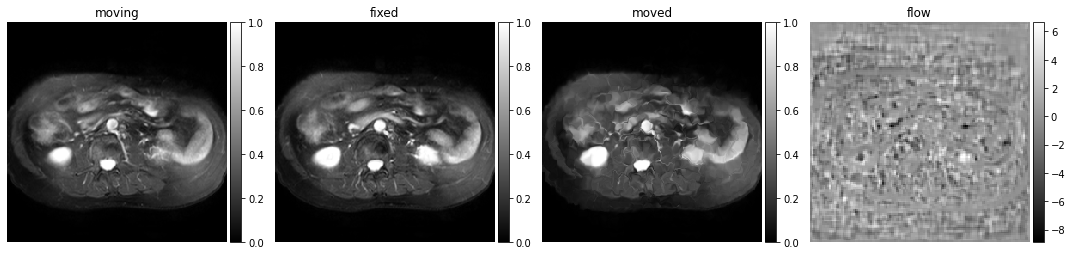

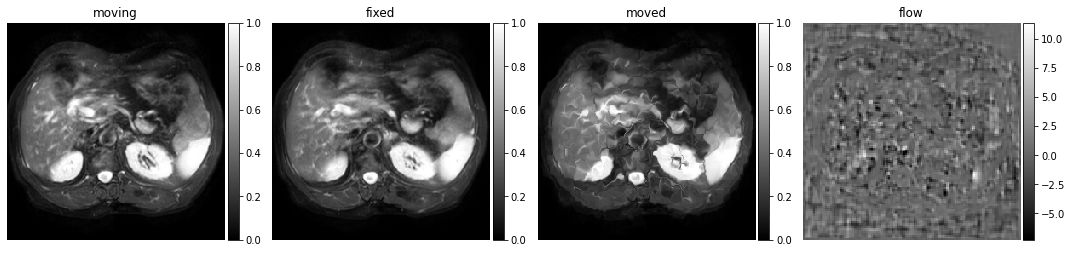

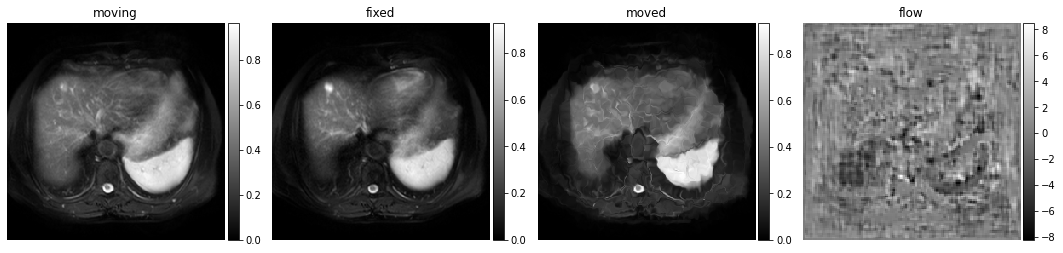

In [30]:
slice_ids = [5, 15, 25]
show(vxm_model, patients, slice_ids=slice_ids)